## Diabetes Predictions using decision tree

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_diabetes = pd.DataFrame(dataset.data ,columns=['age','sex','bmi',
                                                  'bp','s1','s2','s3','s4','s5','s6'])

In [6]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
x = df_diabetes
y = dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333


In [10]:
## correlation
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


<Axes: >

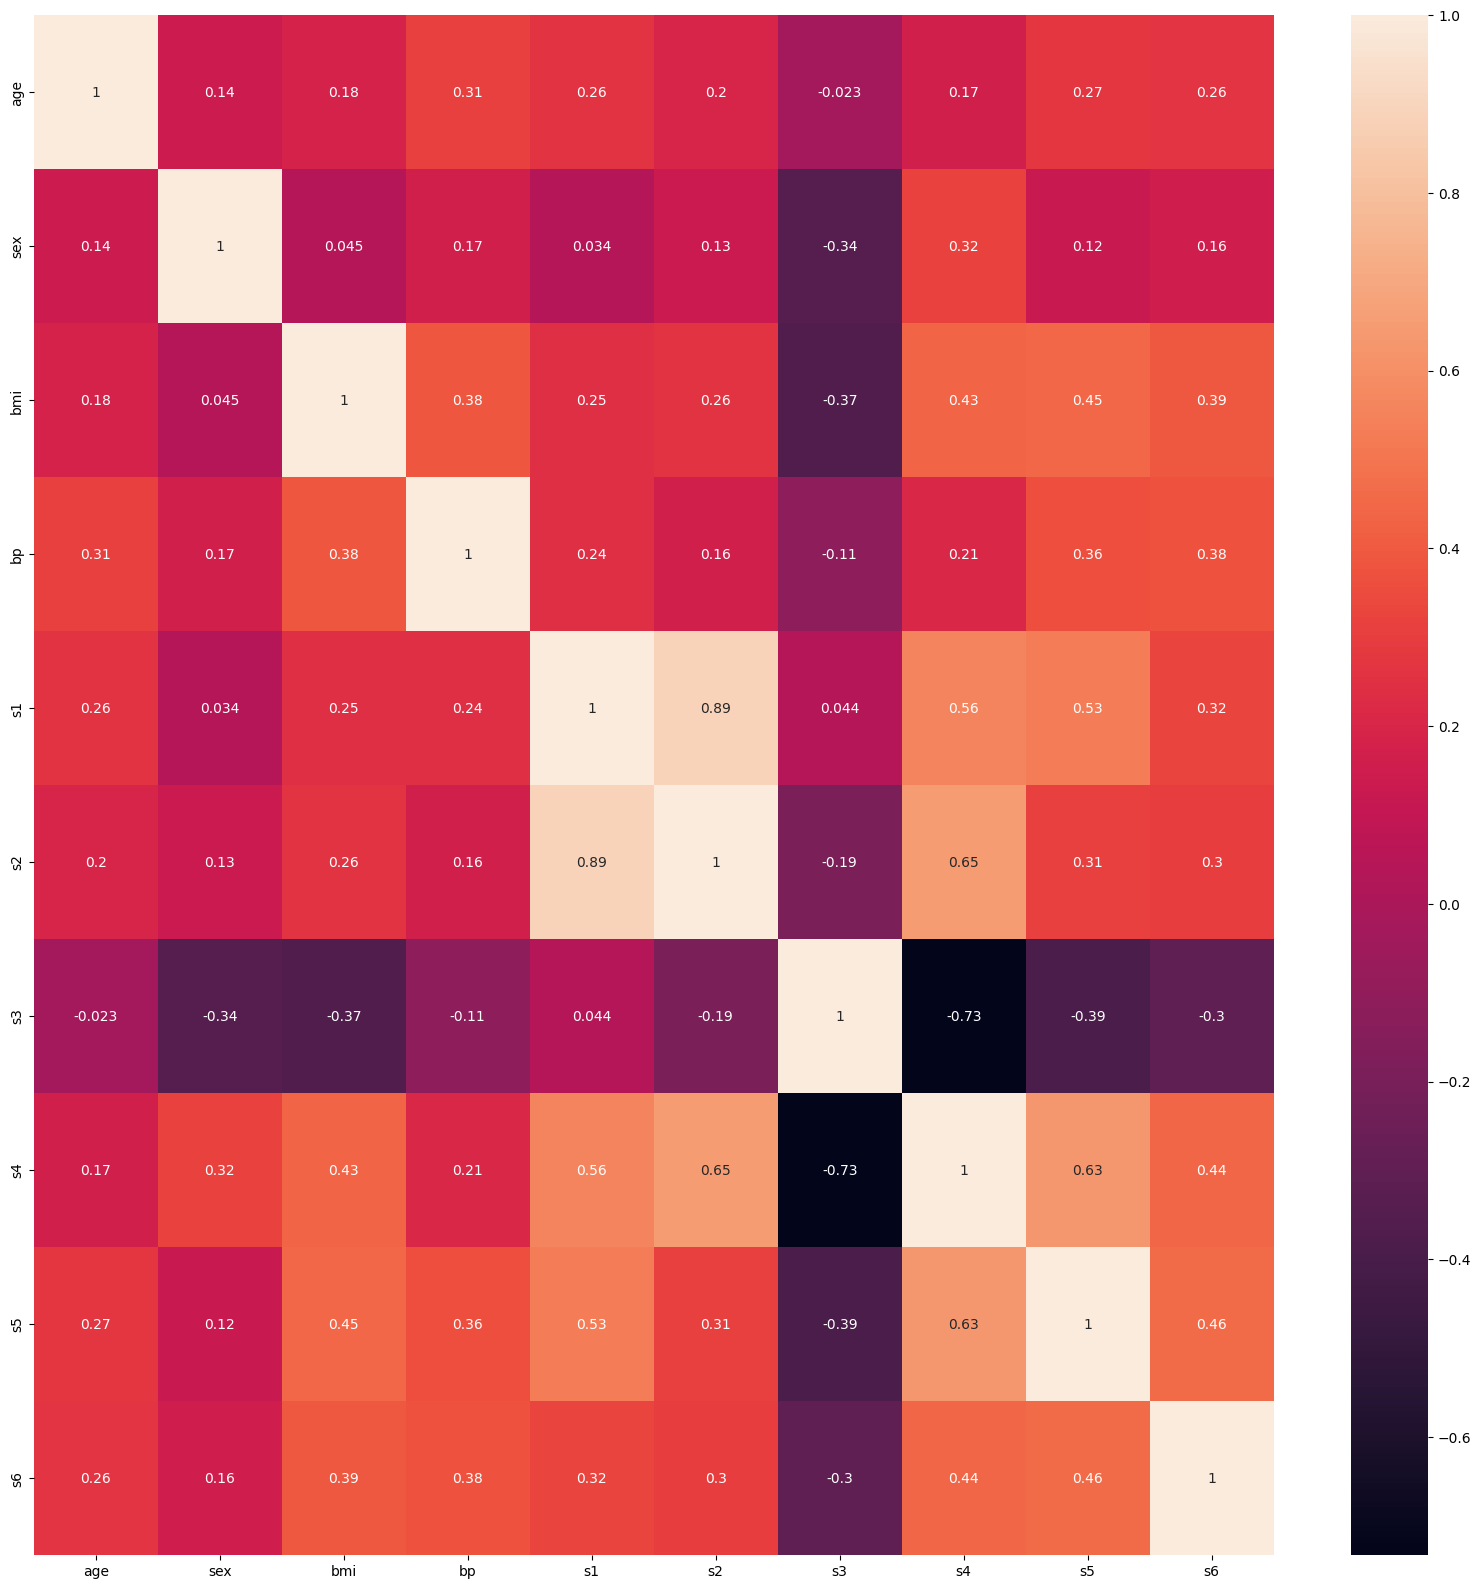

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(x_train.corr(),annot=True)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [13]:
param = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [14]:
from sklearn.model_selection import GridSearchCV


In [15]:
regressor_cv = DecisionTreeRegressor()


In [16]:
grid  = GridSearchCV(regressor_cv,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [17]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [18]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [20]:
## Predictions
y_pred_cv = grid.predict(x_test)

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [22]:
score = r2_score(y_test,y_pred_cv)
mae = mean_absolute_error(y_test,y_pred_cv)
mse = mean_squared_error(y_test,y_pred_cv)
rmse = np.sqrt(mse)

In [23]:
print("R2 square value is ",score)
print("Mean Absolute Error is ",mae)
print("Mean squared Error is ",mse)
print("root mean squared Error is ",rmse)

R2 square value is  0.35541943734175174
Mean Absolute Error is  46.49675422592929
Mean squared Error is  3479.644254558814
root mean squared Error is  58.98850951294509


In [25]:
regressor_best = DecisionTreeRegressor(criterion = 'squared_error',
                                       max_depth = 2,max_features='sqrt',splitter='best')
regressor_best.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt')

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.024\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.5, 'x[9] <= 0.03\nsquared_error = 4588.551\nsamples = 213\nvalue = 130.667'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 3692.03\nsamples = 176\nvalue = 121.375'),
 Text(0.375, 0.16666666666666666, 'squared_error = 6488.928\nsamples = 37\nvalue = 174.865'),
 Text(0.75, 0.5, 'x[6] <= 0.028\nsquared_error = 5753.019\nsamples = 96\nvalue = 205.458'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4899.684\nsamples = 80\nvalue = 218.938'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4569.059\nsamples = 16\nvalue = 138.062')]

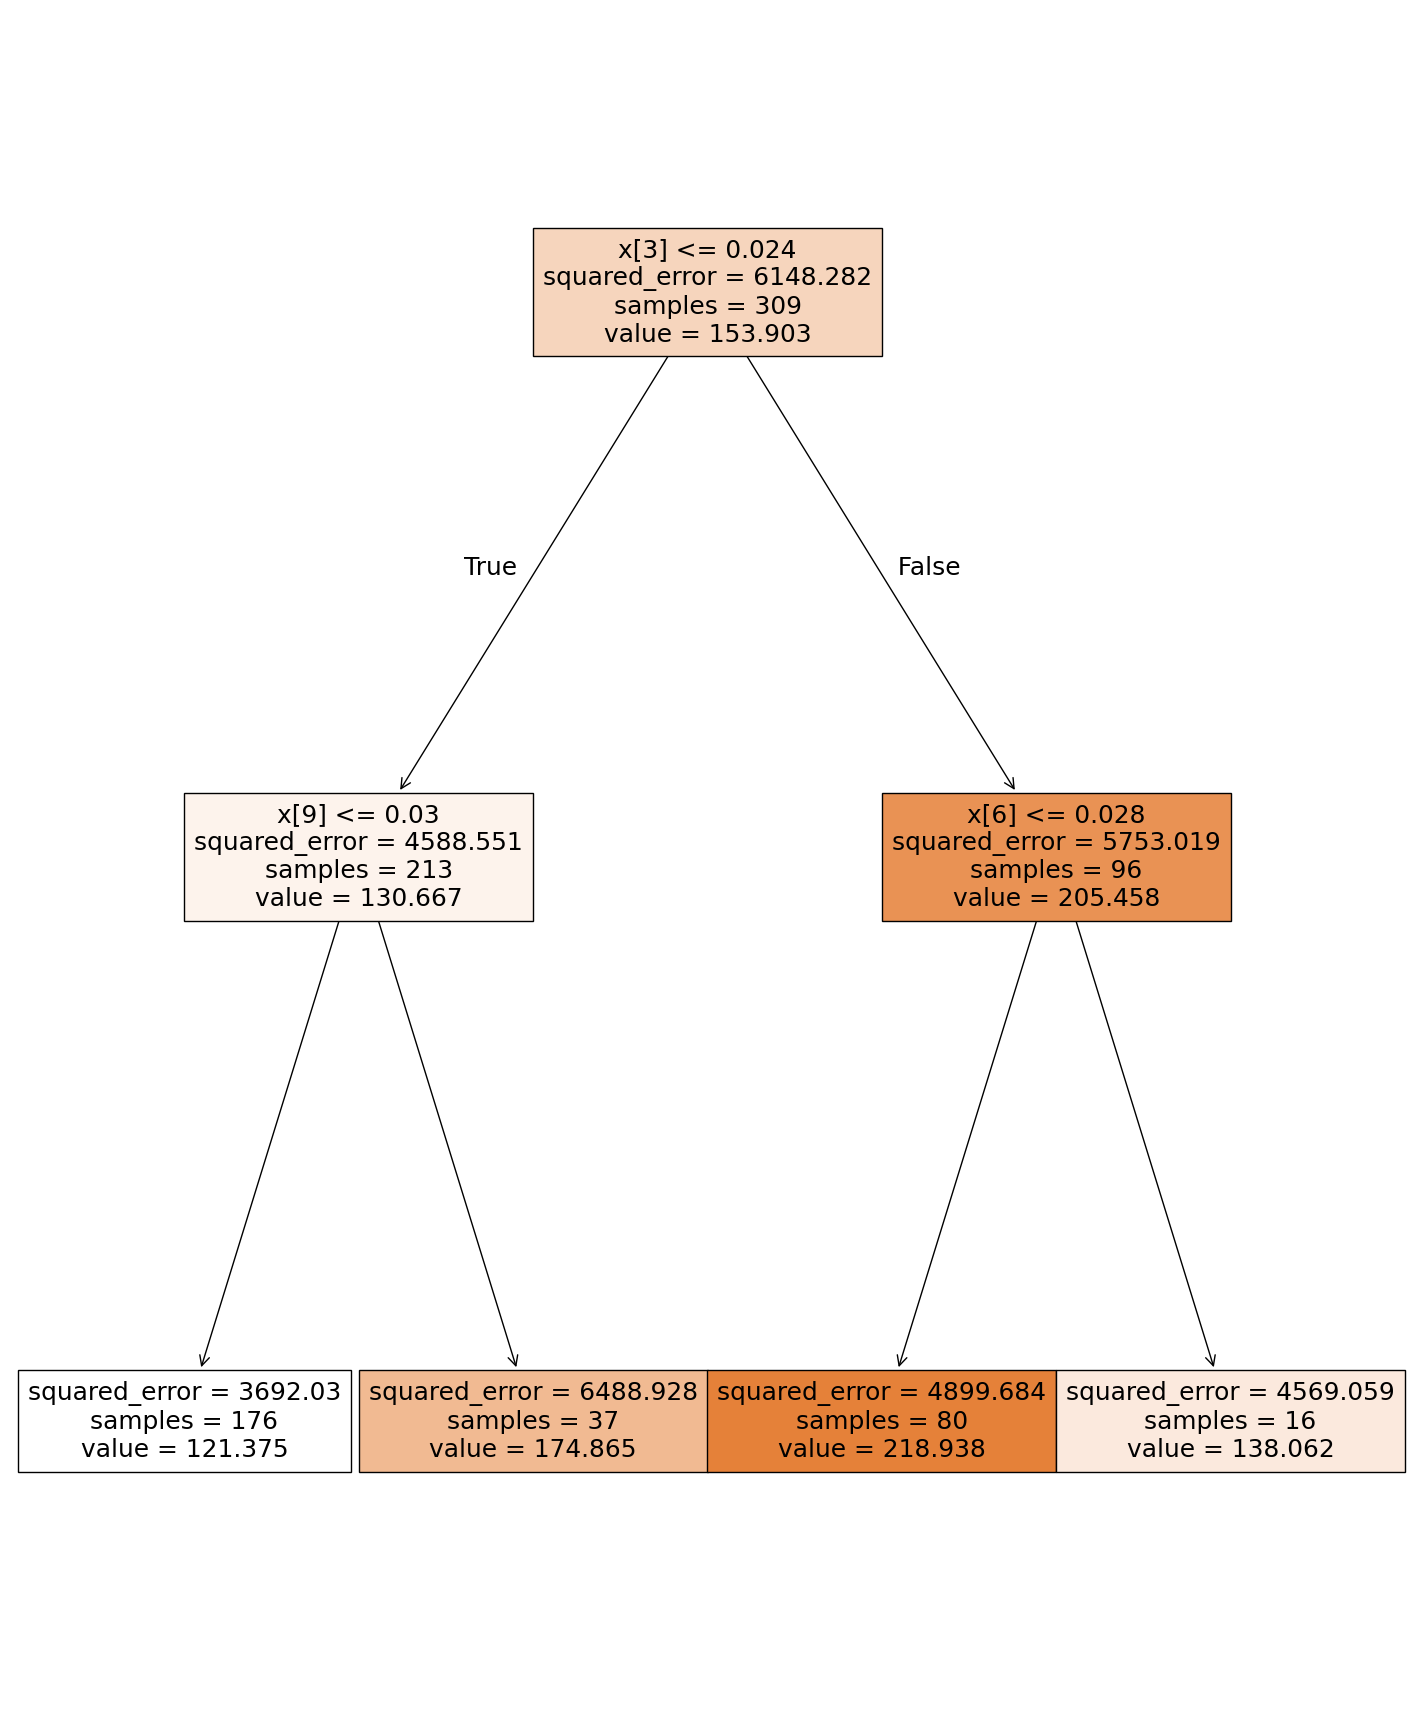

In [26]:
## visualize the Decision tree
from sklearn import tree
plt.figure(figsize=(18,22))
tree.plot_tree(regressor_best,filled=True)